## Setup files to run

In [1]:
import pandas as pd
import sys
import os
import yaml
config_path = os.path.join("..", "config.yaml")
with open(config_path, 'r') as file:
    config = yaml.safe_load(file)
sys.path.append(os.path.abspath(".."))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Importing requirements

In [2]:
from src.load_data import DataLoaderFactory
from src.handelling_missing_values import Impute
from analyse_src.missing_val_analysis import MissingValueAnalysisFactory
from src.preprocessing import PreprocessingFactory
from src.data_splitter import DataSpliter , SimpleTrainTestSplit
from src.model_building import ModelFactory
from src.model_evaluation import ModelEvaluationFactory
from analyse_src.conf import ConfusionAndReportVisualizer

In [3]:
koi_df=DataLoaderFactory().get_loader(".csv").load(r"C:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\data\cumulative_2025.09.17_04.54.35.csv")

2025-10-04 00:11:30,445 -INFO - Loading data from C:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\data\cumulative_2025.09.17_04.54.35.csv


In [4]:
koi_df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [5]:
print(f"Shape of the dataframe before handelling missing values: {koi_df.shape}")

Shape of the dataframe before handelling missing values: (9564, 49)


## **Handelling NAN Values and duplicate**

2025-10-04 00:11:30,576 -INFO - Missing Value Report:
           Column  Missing Values  Percentage
     koi_teq_err1            9564  100.000000
     koi_teq_err2            9564  100.000000
      kepler_name            6817   71.277708
        koi_score            1510   15.788373
   koi_steff_err2             483    5.050188
   koi_slogg_err1             468    4.893350
   koi_slogg_err2             468    4.893350
    koi_srad_err2             468    4.893350
   koi_steff_err1             468    4.893350
    koi_srad_err1             468    4.893350
  koi_period_err2             454    4.746968
  koi_period_err1             454    4.746968
   koi_depth_err1             454    4.746968
   koi_depth_err2             454    4.746968
 koi_time0bk_err1             454    4.746968
 koi_time0bk_err2             454    4.746968
koi_duration_err2             454    4.746968
koi_duration_err1             454    4.746968
  koi_impact_err1             454    4.746968
  koi_impact_err2         

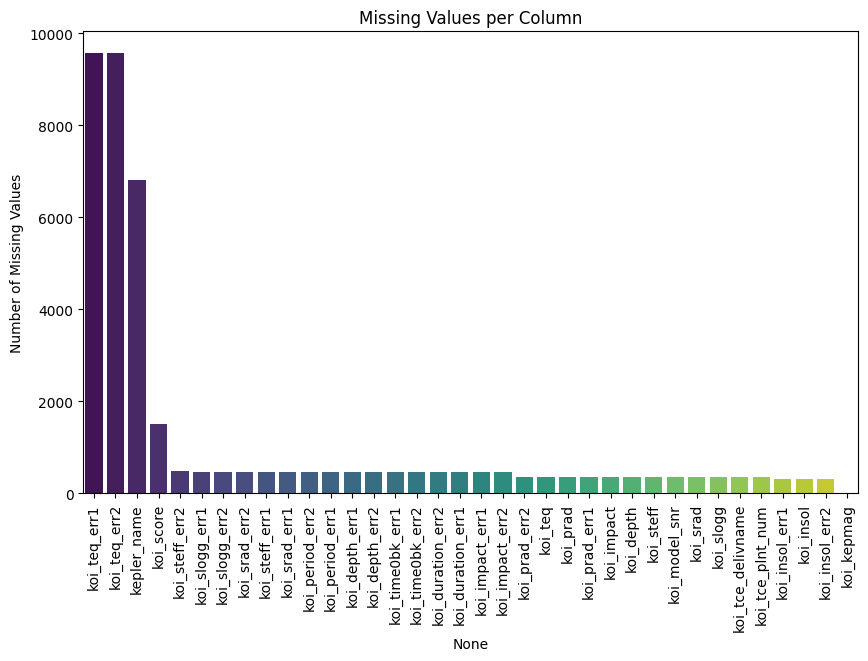

2025-10-04 00:11:31,117 -INFO - Missing value analysis completed and visualized.


In [6]:
missing_val_analysis=MissingValueAnalysisFactory().get_analyzer("report").analyze(koi_df)
missing_val_analysis_visualize=MissingValueAnalysisFactory().get_analyzer("visualize").analyze(koi_df)

In [7]:
koi_fill_nan=Impute().fill_na().handle(koi_df)

2025-10-04 00:11:31,124 -INFO - Imputing missing values with mean for numerical columns and mode for categorical columns
c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\src\handelling_missing_values.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0],inplace=True)
2025-10-04 00:11:31,149 -INFO - Dropping column :koi_teq_err1 --> 100.0% missing
2025-10-04 00:11:31,152 -INFO - Dropping column :koi_teq_err2 --> 100.0% missing
c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\src\hande

In [8]:
print("Null value present :",True if koi_fill_nan.isnull().values.any() else False)

Null value present : False


In [9]:
koi_fill_nan=Impute().handle_duplicates().handle(koi_fill_nan)
print("Duplicated columns:", True if koi_fill_nan.columns.duplicated().any() else False)

2025-10-04 00:11:31,218 -INFO - Removed 0 duplicate rows


Duplicated columns: False


In [10]:
koi_fill_nan.sample(3)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
8302,9640921,K07210.02,Kepler-1 b,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,1,2.178145,0.000013,-0.000013,132.02979,0.00584,-0.00584,0.7800,0.1750,-0.537,2.3210,0.1780,-0.1780,136.0,11.9,-11.9,1.22,0.37,-0.13,1428.0,981.63,881.06,-288.97,13.8,3.0,q1_q17_dr25_tce,6053.0,162.0,-198.0,4.494,0.052,-0.208,0.949,0.291,-0.097,287.96375,46.306911,15.395
1453,5080636,K01843.01,Kepler-974 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,4.194497,0.000006,-0.000006,134.13511,0.00114,-0.00114,0.8630,0.0050,-0.625,1.7807,0.0343,-0.0343,660.7,17.1,-17.1,1.57,0.09,-0.12,577.0,26.20,5.71,-5.91,45.0,1.0,q1_q17_dr25_tce,3706.0,73.0,-92.0,4.747,0.033,-0.033,0.522,0.032,-0.039,285.01309,40.220749,14.404
6507,5213811,K05141.01,Kepler-1 b,FALSE POSITIVE,FALSE POSITIVE,0.334,1,0,0,0,288.285213,0.006879,-0.006879,325.04190,0.01300,-0.01300,0.0503,0.4015,-0.050,5.3430,0.4730,-0.4730,378.1,35.9,-35.9,2.20,1.00,-0.30,312.0,2.25,3.00,-0.76,11.5,1.0,q1_q16_tce,6171.0,148.0,-180.0,4.337,0.113,-0.279,1.127,0.515,-0.154,298.20096,40.392319,12.369


## **Preprocessing Data**

In [11]:
preprocess=PreprocessingFactory().get_preprocessor("remove_columns",columns_to_remove=config["koi_data"]["remove_columns"]).preprocess(koi_fill_nan)

2025-10-04 00:11:31,274 -INFO - Removing columns: ['kepid', 'kepoi_name', 'kepler_name', 'koi_teq_err1', 'koi_teq_err2', 'koi_fpflag_nt', 'koi_impact_err1', 'koi_impact_err2']
2025-10-04 00:11:31,276 -INFO - Columns removed successfully


In [12]:
process_target_encode=PreprocessingFactory().get_preprocessor("map_values",column_name=config["koi_data"]["target_column"],mapping_dict=config["koi_data"]["target_map_values"]).preprocess(preprocess)

2025-10-04 00:11:31,290 -INFO - Mapping values in column: koi_disposition
2025-10-04 00:11:31,291 -INFO - Values mapped successfully


In [13]:
process_target_encode=PreprocessingFactory().get_preprocessor("map_values",column_name=config["koi_data"]["pdistribution"],mapping_dict=config["koi_data"]["pdis_map"]).preprocess(process_target_encode)

2025-10-04 00:11:31,305 -INFO - Mapping values in column: koi_pdisposition
2025-10-04 00:11:31,307 -INFO - Values mapped successfully


In [14]:
process_target_encode=PreprocessingFactory().get_preprocessor("map_values",column_name=config["koi_data"]["koi_tce_delivname"],mapping_dict=config["koi_data"]["koi_tce_delivname_map"]).preprocess(process_target_encode)

2025-10-04 00:11:31,316 -INFO - Mapping values in column: koi_tce_delivname
2025-10-04 00:11:31,321 -INFO - Values mapped successfully


In [15]:
process_target_encode.sample(3)

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
2254,0,0,0.000,0,1,1,5.266481,0.000032,-0.000032,131.69020,0.00425,-0.00425,0.403,1.9640,0.1770,-0.1770,97.8,7.8,-7.8,1.07,0.35,-0.12,1155.0,420.53,393.91,-131.88,16.0,1.0,0,6204.0,168.0,-206.0,4.394,0.090,-0.210,1.065,0.340,-0.121,293.96689,42.841888,13.648
1090,1,2,0.989,0,0,0,53.449445,0.000067,-0.000067,149.20185,0.00103,-0.00103,0.092,5.3091,0.0439,-0.0439,3437.0,33.2,-33.2,5.82,1.49,-0.50,486.0,13.23,10.07,-3.61,119.5,1.0,0,5919.0,162.0,-203.0,4.485,0.044,-0.187,1.000,0.257,-0.086,291.08380,40.355251,15.287
3111,1,2,1.000,0,0,0,25.695815,0.000058,-0.000058,188.78889,0.00175,-0.00175,0.680,4.0251,0.0791,-0.0791,1130.8,29.0,-29.0,1.70,0.21,-0.33,314.0,2.30,1.17,-1.10,45.1,1.0,0,3787.0,163.0,-204.0,4.775,0.096,-0.056,0.477,0.061,-0.092,294.71194,39.073761,14.885


In [16]:
process_target_encode.columns#koi_impact_err1,koi_impact_err1

Index(['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

## **Splitting data to train model**

In [17]:
x_train,x_test,y_train,y_test=DataSpliter(SimpleTrainTestSplit(test_size=config["data_splitter"]["test_size"],random_state=config["data_splitter"]["random_state"])).split(process_target_encode,config["koi_data"]["target_column"])

2025-10-04 00:11:31,383 -INFO - Splitting data..
2025-10-04 00:11:31,383 -INFO - Performing simple Train-Test-Split.
2025-10-04 00:11:31,393 -INFO - Train-Test-Split completed.


In [18]:
print(f"Shape of x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}, y_test: {y_test.shape}")

Shape of x_train: (7651, 40), y_train: (7651,)
Shape of x_test: (1913, 40), y_test: (1913,)


In [19]:
koi_model=ModelFactory().get_model("lstm_model").build_model(x_train,x_test,y_train,y_test)

2025-10-04 00:11:31,413 -INFO - Building LSTM model
2025/10/04 00:11:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/10/04 00:11:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2025/10/04 00:11:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/10/04 00:11:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2025/10/04 00:11:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
c:\Users\rk186\OneDrive\Desktop\NASA_challenge_2025\nasa_challenge\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6054 - loss: 0.8668

2025-10-04 00:11:45,484 -WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7050 - loss: 0.6584 - val_accuracy: 0.8343 - val_loss: 0.3223
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8475 - loss: 0.2896

2025-10-04 00:11:55,195 -WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.8689 - loss: 0.2714 - val_accuracy: 0.9028 - val_loss: 0.2252
Epoch 3/50
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9134 - loss: 0.2119

2025-10-04 00:12:04,755 -WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9192 - loss: 0.2015 - val_accuracy: 0.9137 - val_loss: 0.2091
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9269 - loss: 0.1896 - val_accuracy: 0.9143 - val_loss: 0.2380
Epoch 5/50
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9185 - loss: 0.2228

2025-10-04 00:12:24,029 -WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9221 - loss: 0.2018 - val_accuracy: 0.9137 - val_loss: 0.2060
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9302 - loss: 0.1736 - val_accuracy: 0.9169 - val_loss: 0.2093
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9299 - loss: 0.1768 - val_accuracy: 0.9028 - val_loss: 0.2333
Epoch 8/50
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9269 - loss: 0.1809

2025-10-04 00:12:54,749 -WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


240/240 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9298 - loss: 0.1749 - val_accuracy: 0.9127 - val_loss: 0.2009
Epoch 9/50
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9324 - loss: 0.1728

2025-10-04 00:13:04,402 -WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9337 - loss: 0.1697 - val_accuracy: 0.9247 - val_loss: 0.1909
Epoch 10/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9349 - loss: 0.1750 - val_accuracy: 0.9174 - val_loss: 0.1979
Epoch 11/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9307 - loss: 0.1836 - val_accuracy: 0.9153 - val_loss: 0.2025
Epoch 12/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9354 - loss: 0.1673 - val_accuracy: 0.9200 - val_loss: 0.1955
Epoch 13/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9340 - loss: 0.1695 - val_accuracy: 0.9232 - val_loss: 0.1957
Epoch 14/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9327 - loss: 0.1679 - val_accuracy: 0.9185 - val_loss: 0.1938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


2025/10/04 00:13:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/04 00:14:01 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\rk186\AppData\Local\Temp\tmpxw6p1u5d\model, flavor: tensorflow). Fall back to return ['tensorflow==2.20.0', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025-10-04 00:14:01,999 -INFO - LSTM model training completed


In [20]:
ModelEvaluationFactory().get_evaluator("dl").evaluate(koi_model,"test",x_test,y_test)


2025-10-04 00:14:02,013 -INFO - Model evaluation started for deep learning (LSTM)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9247 - loss: 0.1909


2025-10-04 00:14:02,799 -INFO - Deep learning evaluation completed. Accuracy: 0.9247255325317383


0.9247255325317383

In [27]:
#ModelEvaluationFactory().get_evaluator("accuracy").evaluate(koi_model,"train",x_train,y_train)
import numpy as np
from sklearn.metrics import classification_report
x_test=np.array(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
y_pred = np.argmax(koi_model.predict(x_test), axis=1)

cr=classification_report(y_test,y_pred)
print(cr)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       939
           1       0.86      0.90      0.88       569
           2       0.85      0.79      0.82       405

    accuracy                           0.92      1913
   macro avg       0.90      0.90      0.90      1913
weighted avg       0.92      0.92      0.92      1913



In [22]:
# ConfusionAndReportVisualizer().get_confusion_matrix_visualizer().plot(y_test,koi_model.predict(x_test),[0,1,2])